# 弦图

## 快速出图

弦图是一种用于展示大脑不同区域之间连接关系的可视化图表。
通过弧线将脑区相连，可以快速了解脑区之间的连接。

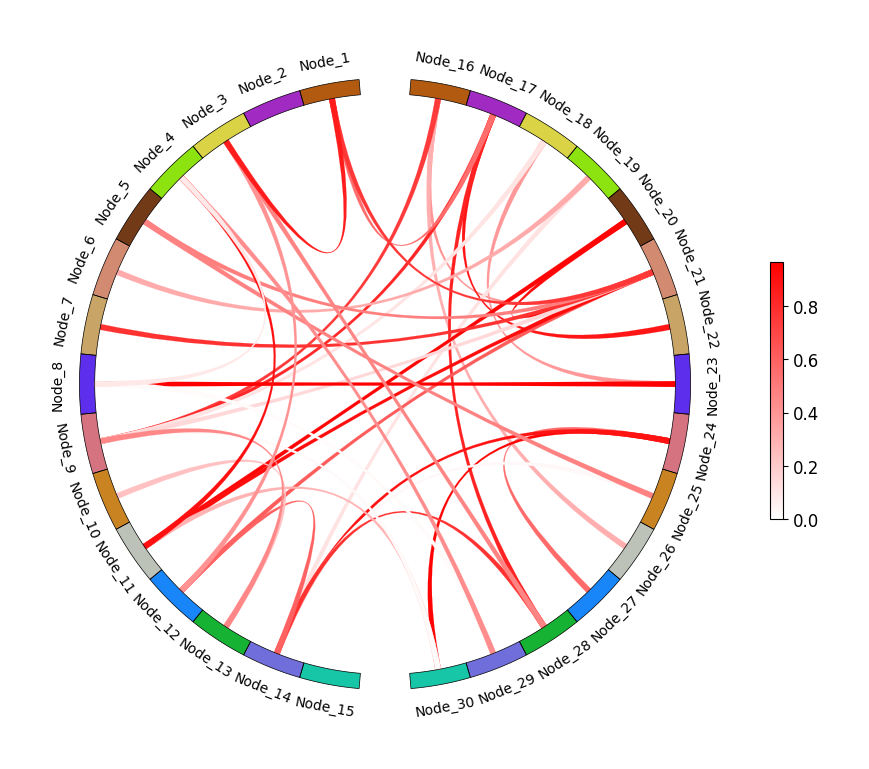

In [1]:
from plotfig import plot_circos_figure
from plotfig.utils import gen_symmetric_matrix

# 随机生成对称加权矩阵（对角线为0）
connectome = gen_symmetric_matrix(30, mode="nonneg", sparsity=0.1)

# 画图
fig = plot_circos_figure(connectome)

# 保存图片
# fig.savefig("./figures/circos1.png")

## 参数设置

全部参数见[`plot_circos_figure`](../api/index.md/#plotfig.circos.plot_circos_figure)的 API 文档。

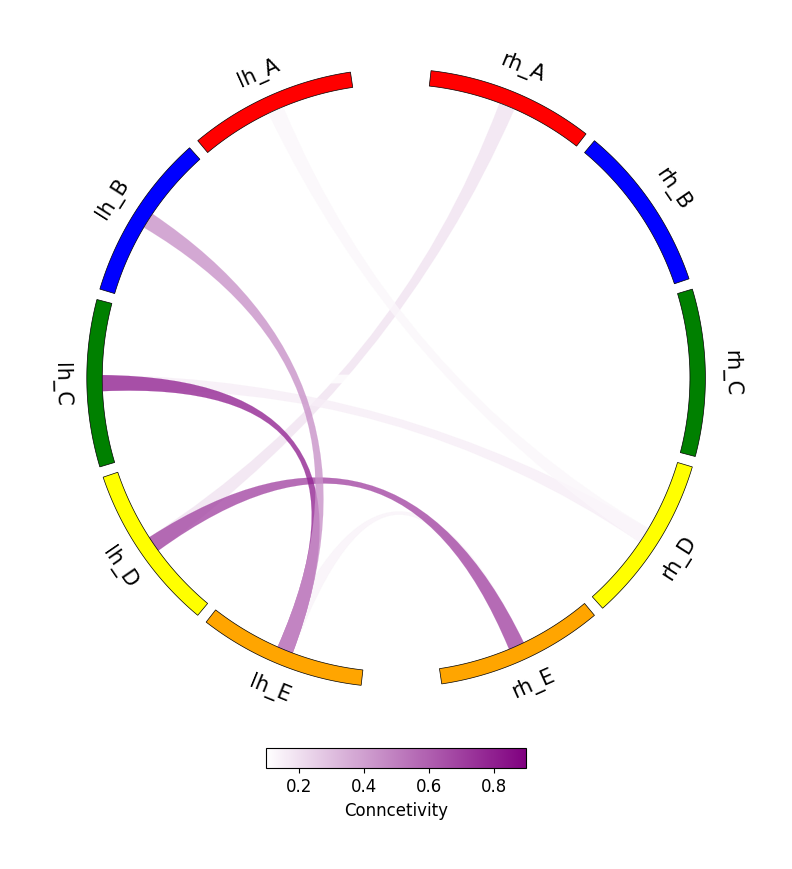

In [2]:
from plotfig import plot_circos_figure
from plotfig.utils import gen_symmetric_matrix

# 随机生成一个10x10的对称加权矩阵（对角线为0）
connectome = gen_symmetric_matrix(10, mode="nonneg", sparsity=0.2)
node_names = ["lh_A", "lh_B", "lh_C", "lh_D", "lh_E", "rh_A", "rh_B", "rh_C", "rh_D", "rh_E"]
node_colors = ["#ff0000", "blue", "green", "yellow", "orange", "red", "blue", "green", "yellow", "orange"]

# 画图
fig = plot_circos_figure(
    connectome,
    symmetric=True,
    node_names=node_names,
    node_colors=node_colors,
    node_space=2,
    node_label_fontsize=15,
    vmin=0.1,
    vmax=0.9,
    edge_color="purple",
    edge_alpha=0.8,
    colorbar=True,
    colorbar_orientation="horizontal",
    colorbar_label="Conncetivity",
)

# 保存图片
# fig.savefig("./figures/circos.png")

### 与其他图组合

在默认情况下，`plot_circos_figure` 函数会返回一个 `fig`，可以直接用于保存，例如 `fig.savefig("./figures/circos.png")`。

在特殊情况下，我们也可以返回 `ax`，以便将其与其他图组合使用。

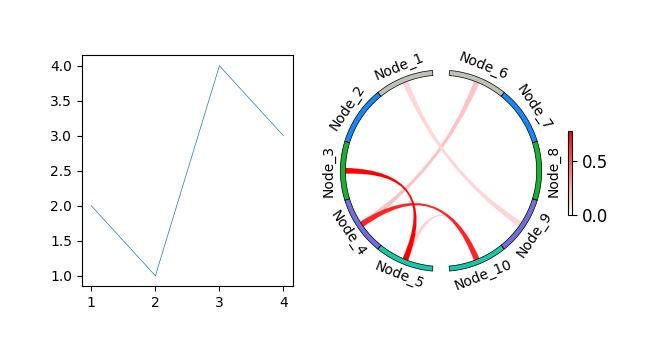

In [3]:
import matplotlib.pyplot as plt
from plotfig import plot_circos_figure
from plotfig.utils import gen_symmetric_matrix

fig = plt.figure(figsize=(6, 3))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot([1, 2, 3, 4], [2, 1, 4, 3])

ax2 = fig.add_subplot(1, 2, 2, projection="polar")
connectome = gen_symmetric_matrix(10, mode="nonneg", sparsity=0.1)
ax2 = plot_circos_figure(connectome, ax=ax2)

# 保存图片
# fig.savefig("./figures/circos.png")

### 对称与非对称弦图

`plotfig` 可以绘制对称或不对称两种样式的弦图。只需通过 `symmetric` 参数进行设置。

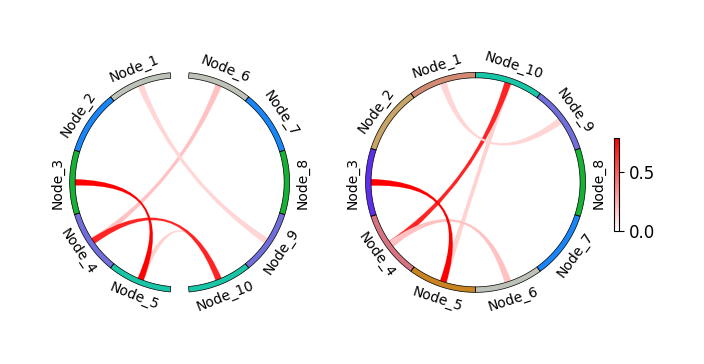

In [4]:
import matplotlib.pyplot as plt
from plotfig import plot_circos_figure
from plotfig.utils import gen_symmetric_matrix

fig = plt.figure(figsize=(7, 3))
ax1 = fig.add_subplot(1, 2, 1, projection="polar")
ax2 = fig.add_subplot(1, 2, 2, projection="polar")

connectome = gen_symmetric_matrix(10, mode="nonneg", sparsity=0.1)

ax1 = plot_circos_figure(connectome, symmetric=True, ax=ax1, colorbar=False)
ax2 = plot_circos_figure(connectome, symmetric=False, ax=ax2)

# 保存图片
# fig.savefig("./figures/circos.png")

### 边的颜色

`edge_color` 参数可用于设置边的颜色，但无论如何，边的深浅仍会根据连接权重自动调整。

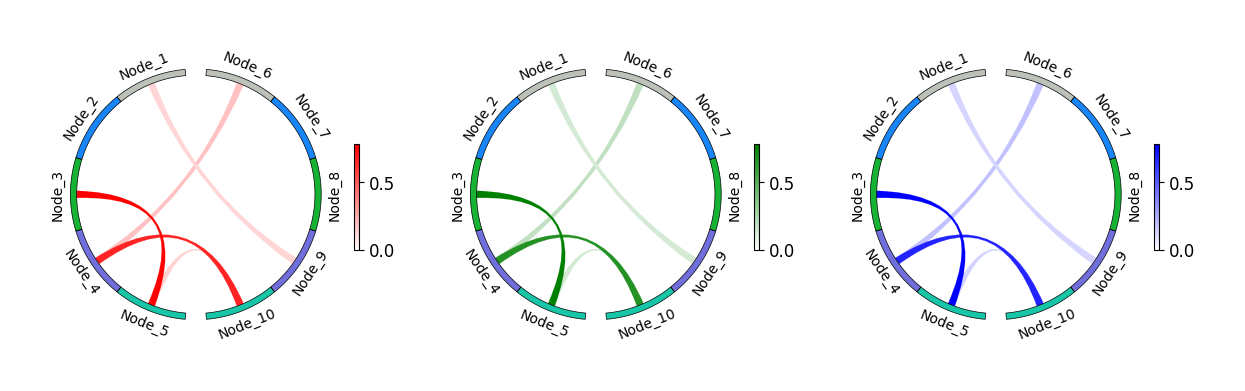

In [5]:
import matplotlib.pyplot as plt
from plotfig import plot_circos_figure
from plotfig.utils import gen_symmetric_matrix

fig = plt.figure(figsize=(12, 3), layout="constrained")
ax1 = fig.add_subplot(1, 3, 1, projection="polar")
ax2 = fig.add_subplot(1, 3, 2, projection="polar")
ax3 = fig.add_subplot(1, 3, 3, projection="polar")

connectome = gen_symmetric_matrix(10, mode="nonneg", sparsity=0.1)

ax1 = plot_circos_figure(connectome, ax=ax1, edge_color="red")
ax2 = plot_circos_figure(connectome, ax=ax2, edge_color="green")
ax3 = plot_circos_figure(connectome, ax=ax3, edge_color="blue")

# 保存图片
# fig.savefig("./figures/circos.png")

也可以通过 `cmap` 参数应用 Matplotlib 内置的常用颜色映射（Colormap）。

!!! warning
    当使用`cmap`时，`edge_color`参数将不再生效。

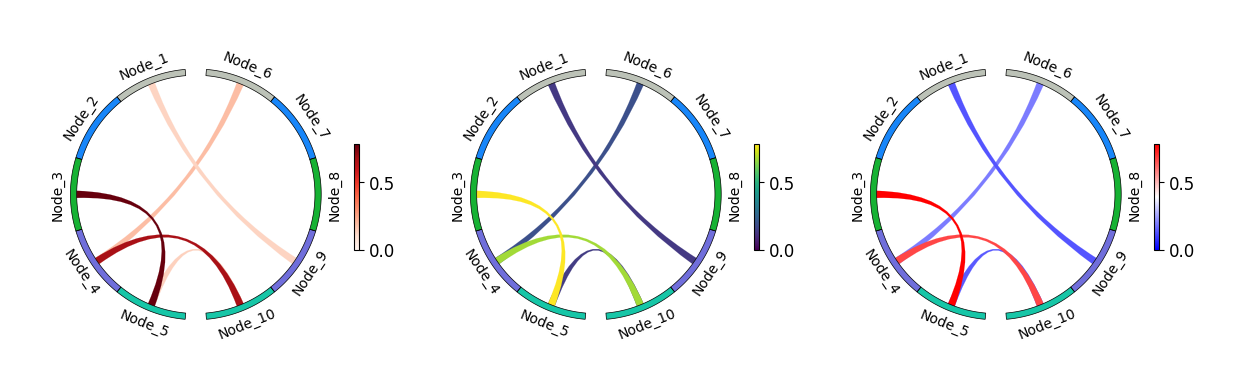

In [6]:
import matplotlib.pyplot as plt
from plotfig import plot_circos_figure
from plotfig.utils import gen_symmetric_matrix

fig = plt.figure(figsize=(12, 3), layout="constrained")
ax1 = fig.add_subplot(1, 3, 1, projection="polar")
ax2 = fig.add_subplot(1, 3, 2, projection="polar")
ax3 = fig.add_subplot(1, 3, 3, projection="polar")

connectome = gen_symmetric_matrix(10, mode="nonneg", sparsity=0.1)

ax1 = plot_circos_figure(connectome, ax=ax1, cmap="Reds")
ax2 = plot_circos_figure(connectome, ax=ax2, cmap="viridis")
ax3 = plot_circos_figure(connectome, ax=ax3, cmap="bwr")

# 保存图片
# fig.savefig("./figures/circos.png")

当 connectome 数据中存在负值时，无法自定义边的颜色，系统将默认使用 Matplotlib 的 `bwr` 颜色映射。

2025-09-05 15:09:37.347 | WARNING  | plotfig.circos:plot_circos_figure:116 - 由于 connectome 存在负值，连线颜色无法自定义，只能正值显示红色，负值显示蓝色


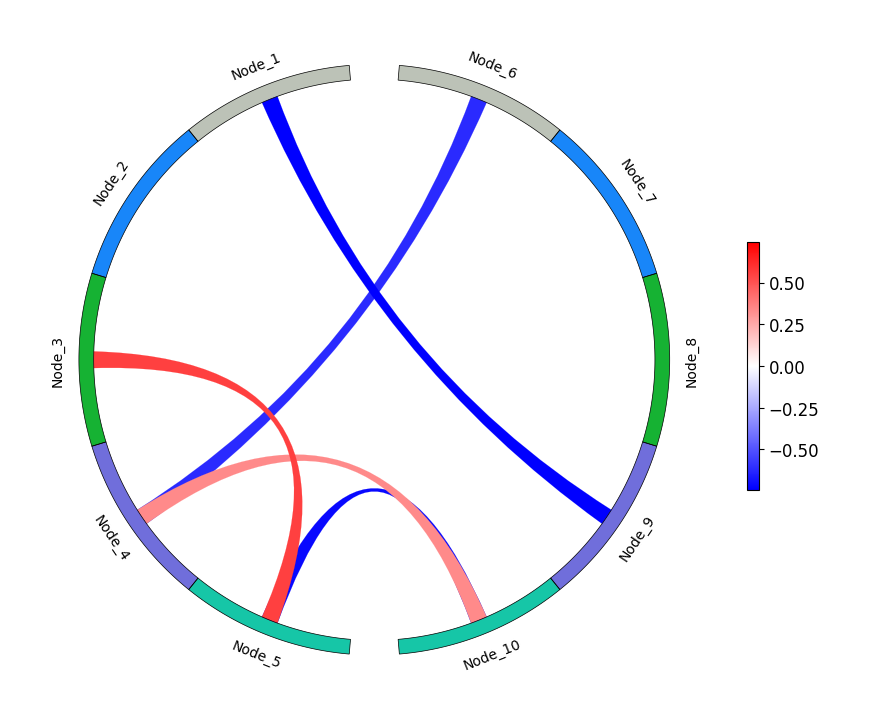

In [7]:
from plotfig import plot_circos_figure
from plotfig.utils import gen_symmetric_matrix

# 生成带负值的对称矩阵
connectome = gen_symmetric_matrix(10, mode="all", sparsity=0.1)

fig = plot_circos_figure(connectome)

# 保存图片
# fig.savefig("./figures/circos.png")